<a href="https://colab.research.google.com/github/JohnWu777/Colab-python-class/blob/main/MA_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Import the XLSX file
DDA_raw = pd.read_excel('HW3.xlsx')

# Display the first few rows of the data
print(DDA_raw.head())

   Unnamed: 0          id       班次日期 license_plate  employee_id event_id  \
0         1.0  42448201.0 2022-04-24        551-U9   10906005.0  SDW_0.4   
1         2.0  42449133.0 2022-04-24        551-U9   10906005.0  SDW_0.4   
2         3.0  42449182.0 2022-04-24        551-U9   10906005.0  SDW_0.4   
3         4.0  42449600.0 2022-04-24        551-U9   10906005.0  SDW_0.4   
4         5.0  42449692.0 2022-04-24        551-U9   10906005.0  SDW_0.4   

             start_time              end_time    剪輯起始時間    剪輯結束時間  ...  拿東西  \
0  2022-04-24T10:47:36Z  2022-04-24T10:47:37Z  10:47:06  10:47:47  ...  1.0   
1  2022-04-24T11:54:34Z  2022-04-24T11:54:34Z  11:54:04  11:54:44  ...  0.0   
2  2022-04-24T11:59:16Z  2022-04-24T11:59:16Z  11:58:46  11:59:26  ...  0.0   
3  2022-04-24T12:26:24Z  2022-04-24T12:26:24Z  12:25:54  12:26:34  ...  0.0   
4  2022-04-24T12:33:22Z  2022-04-24T12:33:23Z  12:32:52  12:33:33  ...  0.0   

  用手機(手持) 手靠近嘴巴( 飲食or抽菸 or...)  speed  GPSspeed  night  rain  Age  S

In [ ]:
# 檢查類別分佈
import numpy as np
unique, counts = np.unique(y, return_counts=True)
print("類別分佈：", dict(zip(unique, counts)))

類別分佈： {'SDW_0.4': 116, 'SDW_1.2': 116}


資料集1(全因素輸入)

In [ ]:
# Choose variables(columns) and save as DDA
columns_to_select1=[5 ,23 ,27, 28 ,29]
DDA1 = DDA_raw.iloc[:, columns_to_select1]

#Display the first few rows of DDA to confirm
print(DDA1.head())

  event_id  speed  Age  Syear  Lyear
0  SDW_0.4   88.0  NaN    3.0    NaN
1  SDW_0.4   92.0  NaN    3.0    NaN
2  SDW_0.4   96.0  NaN    3.0    NaN
3  SDW_0.4   93.0  NaN    3.0    NaN
4  SDW_0.4  102.0  NaN    3.0    NaN


清洗資料1(含speed,Age,Syear,Lyear)

In [ ]:
DDAc1 = DDA1.dropna(axis=0, how='any')

print(DDAc1)

     event_id  speed   Age  Syear  Lyear
26    SDW_0.4   78.0  50.0   12.0   19.0
27    SDW_0.4   77.0  50.0   12.0   19.0
28    SDW_0.4   89.0  50.0   12.0   19.0
29    SDW_0.4  104.0  50.0   12.0   19.0
30    SDW_0.4   92.0  50.0   12.0   19.0
...       ...    ...   ...    ...    ...
1263  SDW_1.2   97.0  51.0    9.0   10.0
1264  SDW_1.2  104.0  51.0    9.0   10.0
1282  SDW_1.2   91.0  39.0    9.0    9.0
1283  SDW_1.2   84.0  39.0    9.0    9.0
1284  SDW_1.2  105.0  39.0    9.0    9.0

[624 rows x 5 columns]


<Axes: >

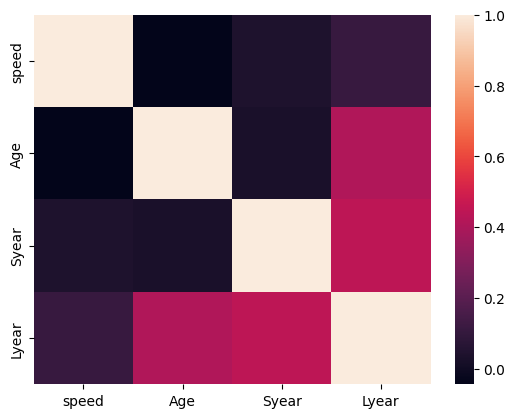

In [ ]:
import seaborn as sns
COR = DDAc1.loc[:,['speed','Age','Syear','Lyear']]
cormat = COR.corr()
sns.heatmap(cormat)

資料集2(部分資料輸入)

In [ ]:
# Choose variables(columns) and save as DDA
columns_to_select2=[5 ,23 ,27, 28]
DDA2 = DDA_raw.iloc[:, columns_to_select2]

#Display the first few rows of DDA to confirm
print(DDA2.head())

  event_id  speed  Age  Syear
0  SDW_0.4   88.0  NaN    3.0
1  SDW_0.4   92.0  NaN    3.0
2  SDW_0.4   96.0  NaN    3.0
3  SDW_0.4   93.0  NaN    3.0
4  SDW_0.4  102.0  NaN    3.0


清洗資料2(含speed,Age)

In [ ]:
DDAc2 = DDA2.dropna(axis=0, how='any')

print(DDAc2)

     event_id  speed   Age  Syear
26    SDW_0.4   78.0  50.0   12.0
27    SDW_0.4   77.0  50.0   12.0
28    SDW_0.4   89.0  50.0   12.0
29    SDW_0.4  104.0  50.0   12.0
30    SDW_0.4   92.0  50.0   12.0
...       ...    ...   ...    ...
1263  SDW_1.2   97.0  51.0    9.0
1264  SDW_1.2  104.0  51.0    9.0
1282  SDW_1.2   91.0  39.0    9.0
1283  SDW_1.2   84.0  39.0    9.0
1284  SDW_1.2  105.0  39.0    9.0

[624 rows x 4 columns]


<Axes: >

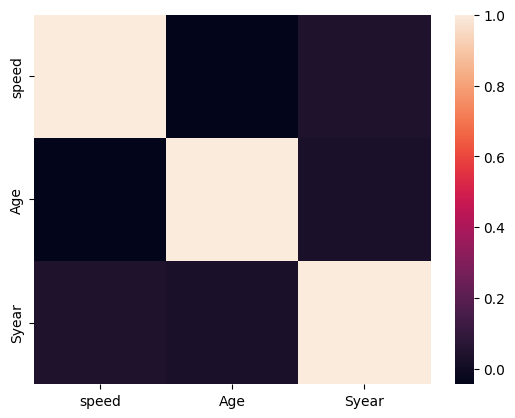

In [ ]:
import seaborn as sns
COR = DDAc2.loc[:,['speed','Age','Syear']]
cormat = COR.corr()
sns.heatmap(cormat)

從相關矩陣熱力圖得知，資料集2較無共線性問題

了解不同資料集缺失值情況(情況相同:age,Lyear)

In [ ]:
# 計算第 5 列的類別變數數量
DDAc1_y_counts = DDAc1.iloc[:, 0].value_counts()
DDAc2_y_counts = DDAc2.iloc[:, 0].value_counts()
DDAc3_y_counts = DDAc3.iloc[:, 0].value_counts()
# 顯示結果
print(DDAc1_y_counts)
print("\n")
print(DDAc2_y_counts)
print("\n")
print(DDAc3_y_counts)

event_id
SDW_0.4    508
SDW_1.2    116
Name: count, dtype: int64


event_id
SDW_0.4    508
SDW_1.2    116
Name: count, dtype: int64


event_id
SDW_0.4    508
SDW_1.2    116
Name: count, dtype: int64


In [ ]:
# 檢查類別分佈
import numpy as np
unique, counts = np.unique(y, return_counts=True)
print("類別分佈：", dict(zip(unique, counts)))

類別分佈： {'SDW_0.4': 116, 'SDW_1.2': 116}


以資料集1為例做抽樣

In [ ]:
import pandas as pd

# 顯示 DDA 的前幾行以確認
print(DDAc1.head())

# 獲取第五列的名稱，方便引用
column_name = DDAc1.columns[0]

# 將數據按類別分組
grouped = DDAc1.groupby(column_name)

# 找到量多的類別並抽樣，使其與量少的類別匹配
majority_class = grouped.get_group('SDW_0.4')  # 量多的類別
minority_class = grouped.get_group('SDW_1.2')  # 量少的類別

# 從量多的類別中隨機抽樣，樣本數量與量少的類別相同
majority_class_sampled = majority_class.sample(n=len(minority_class), random_state=42)

# 合併抽樣后的多數類別和少數類別
balanced_DDAc1 = pd.concat([majority_class_sampled, minority_class])

# 顯示平衡后的數據集的前幾行
print(balanced_DDAc1.head())

# 計算第 5 列的類別變數數量
DDAc1_y_counts_balance = balanced_DDAc1.iloc[:, 0].value_counts()

# 顯示結果
print(DDAc1_y_counts_balance)

   event_id  speed   Age  Syear  Lyear
26  SDW_0.4   78.0  50.0   12.0   19.0
27  SDW_0.4   77.0  50.0   12.0   19.0
28  SDW_0.4   89.0  50.0   12.0   19.0
29  SDW_0.4  104.0  50.0   12.0   19.0
30  SDW_0.4   92.0  50.0   12.0   19.0
    event_id  speed   Age  Syear  Lyear
111  SDW_0.4   97.0  35.0    6.0   11.0
491  SDW_0.4  101.0  47.0   21.0   23.0
882  SDW_0.4   90.0  51.0    9.0   10.0
657  SDW_0.4   93.0  51.0    9.0   10.0
262  SDW_0.4   92.0  49.0    5.0   10.0
event_id
SDW_0.4    116
SDW_1.2    116
Name: count, dtype: int64


目前處理到這邊

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
X = balanced_DDAc1[['speed','Age','Syear','Lyear']]
y = balanced_DDAc1.loc[:,"event_id"]

# Inotoalize and fit the LDA model
lda_model = LDA()
lda_model.fit(X,y)

# Get the canonical variables
canonical_vars = lda_model.transform(X)

In [ ]:
# Display the canonical variables
print("Canonical Scores:")
print(canonical_vars[:6],"...","\n")

# Inspect the intercept, coefficients and explained variance ratio
print("Intercept of 3 canonical functions:")
print(lda_model.intercept_,"\n")

print("Coefficients of 3 canonical functions:")
print(lda_model.coef_,"\n")

print("Explained Variance Ratio:")
print(lda_model.explained_variance_ratio_,"\n")

Canonical Scores:
[[-1.74770816]
 [ 0.51848121]
 [-0.08909772]
 [-0.2119879 ]
 [-0.69327112]
 [-0.2119879 ]] ... 

Intercept of 3 canonical functions:
[-0.41549696] 

Coefficients of 3 canonical functions:
[[-0.01890277  0.03162661  0.04443504  0.00627591]] 

Explained Variance Ratio:
[1.] 



特徵的重要性： {'speed': 0.6636469140784305, 'Age': 0.12214229703920057, 'Syear': 0.12486980771104982, 'Lyear': 0.0893409811713191}


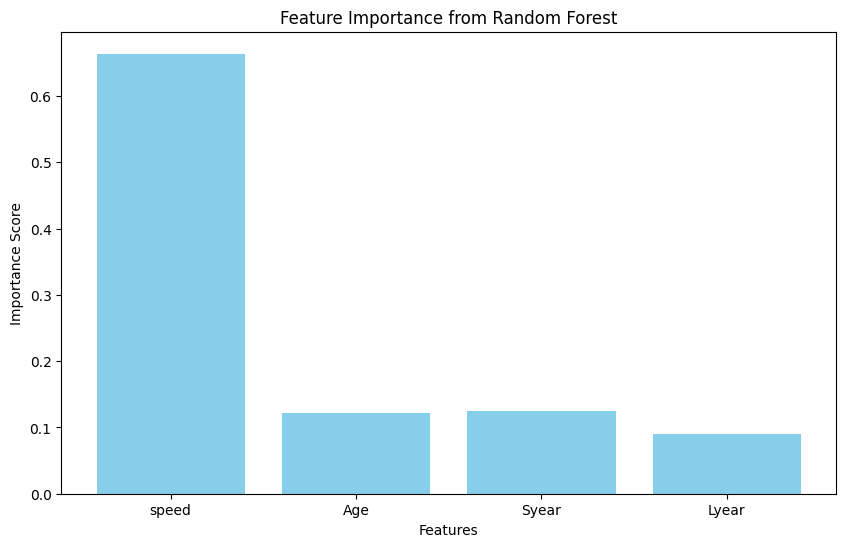

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# 假設您已有 X 和 y 數據
# X 是包含特徵 LS 和 Age 的數據框，y 是目標變量

# 初始化隨機森林模型
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 訓練模型
rf_model.fit(X, y)

# 獲取特徵的重要性
feature_importances = rf_model.feature_importances_

# 查看特徵的重要性
feature_names = X.columns
importance_dict = dict(zip(feature_names, feature_importances))
print("特徵的重要性：", importance_dict)

# 可視化特徵重要性
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance from Random Forest')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions
lda_values = lda_model.predict(X)
lda_proba = lda_model.predict_proba(X)

# Create a DataFrame to store the predictions
lda_results = pd.DataFrame({
    'Predicted_Class': lda_values,
    'Predicted_Probability': [prob.round(3) for prob in lda_proba]#Probabilities for each class
})

# Add the predictions tp original DataFrame
DDAc1_with_predictions = balanced_DDAc1.copy()
DDAc1_with_predictions = pd.concat([DDAc1_with_predictions, lda_results],axis=1)

# Display the first few rows
print("\nFirst few rows of predicitons:")
print(DDAc1_with_predictions.head(10))


First few rows of predicitons:
    event_id  speed   Age  Syear  Lyear Predicted_Class Predicted_Probability
111  SDW_0.4   97.0  35.0    6.0   11.0         SDW_0.4        [0.568, 0.432]
491  SDW_0.4  101.0  47.0   21.0   23.0             NaN                   NaN
882  SDW_0.4   90.0  51.0    9.0   10.0             NaN                   NaN
657  SDW_0.4   93.0  51.0    9.0   10.0             NaN                   NaN
262  SDW_0.4   92.0  49.0    5.0   10.0             NaN                   NaN
890  SDW_0.4   93.0  51.0    9.0   10.0             NaN                   NaN
95   SDW_0.4   97.0  35.0    6.0   11.0         SDW_0.4        [0.555, 0.445]
280  SDW_0.4   99.0  49.0    5.0   10.0             NaN                   NaN
116  SDW_0.4   89.0  35.0    6.0   11.0         SDW_1.2        [0.357, 0.643]
205  SDW_0.4  101.0  57.0   16.0   19.0         SDW_0.4        [0.551, 0.449]


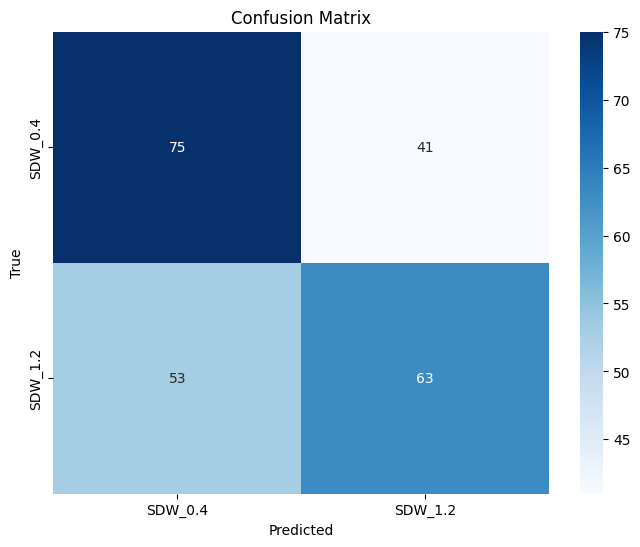

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Compute confusion matrix
conf_atrix = confusion_matrix(y, lda_values, labels=lda_model.classes_)

# Compute accuracy rate
accuracy = accuracy_score(y, lda_values)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_atrix, annot=True, fmt='d', cmap='Blues', xticklabels=lda_model.classes_, yticklabels=lda_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

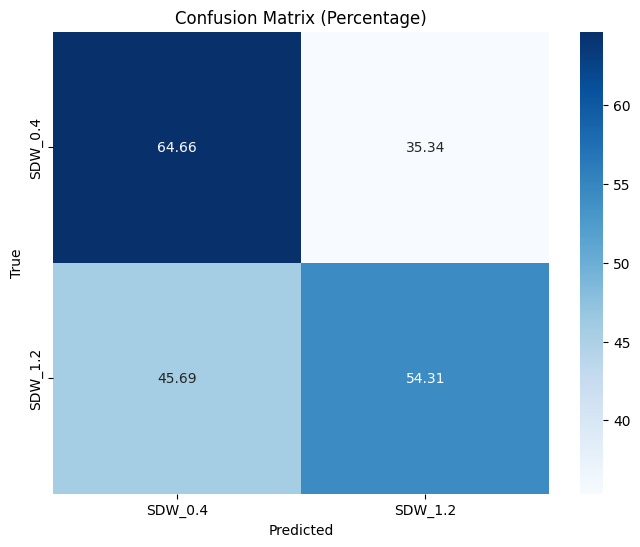

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# 計算混淆矩陣
conf_atrix = confusion_matrix(y, lda_values, labels=lda_model.classes_)

# 計算混淆矩陣每個類別的比例
conf_atrix_percentage = conf_atrix.astype('float') / conf_atrix.sum(axis=1)[:, np.newaxis] * 100

# 計算準確率
accuracy = accuracy_score(y, lda_values)

# 繪製混淆矩陣（百分比格式）
plt.figure(figsize=(8, 6))
sns.heatmap(conf_atrix_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=lda_model.classes_, yticklabels=lda_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Percentage)')
plt.show()


In [ ]:
print("\nAccuracy Rate:")
print(accuracy)


Accuracy Rate:
0.5948275862068966


In [ ]:
# Generate classidicaiton report
report_ann = classification_report(y, lda_values)
print("\nClassification Report:")
print(report_ann)


Classification Report:
              precision    recall  f1-score   support

     SDW_0.4       0.59      0.65      0.61       116
     SDW_1.2       0.61      0.54      0.57       116

    accuracy                           0.59       232
   macro avg       0.60      0.59      0.59       232
weighted avg       0.60      0.59      0.59       232



處理資料2

In [ ]:
import pandas as pd

# 顯示 DDA 的前幾行以確認
print(DDAc2.head())

# 獲取第五列的名稱，方便引用
column_name = DDAc2.columns[0]

# 將數據按類別分組
grouped = DDAc2.groupby(column_name)

# 找到量多的類別並抽樣，使其與量少的類別匹配
majority_class = grouped.get_group('SDW_0.4')  # 量多的類別
minority_class = grouped.get_group('SDW_1.2')  # 量少的類別

# 從量多的類別中隨機抽樣，樣本數量與量少的類別相同
majority_class_sampled = majority_class.sample(n=len(minority_class), random_state=42)

# 合併抽樣后的多數類別和少數類別
balanced_DDAc2 = pd.concat([majority_class_sampled, minority_class])

# 顯示平衡后的數據集的前幾行
print(balanced_DDAc2.head())

# 計算第 5 列的類別變數數量
DDAc2_y_counts_balance = balanced_DDAc2.iloc[:, 0].value_counts()

# 顯示結果
print(DDAc2_y_counts_balance)

   event_id  speed   Age  Syear
26  SDW_0.4   78.0  50.0   12.0
27  SDW_0.4   77.0  50.0   12.0
28  SDW_0.4   89.0  50.0   12.0
29  SDW_0.4  104.0  50.0   12.0
30  SDW_0.4   92.0  50.0   12.0
    event_id  speed   Age  Syear
111  SDW_0.4   97.0  35.0    6.0
491  SDW_0.4  101.0  47.0   21.0
882  SDW_0.4   90.0  51.0    9.0
657  SDW_0.4   93.0  51.0    9.0
262  SDW_0.4   92.0  49.0    5.0
event_id
SDW_0.4    116
SDW_1.2    116
Name: count, dtype: int64


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
X = balanced_DDAc2[['speed','Age','Syear']]
y = balanced_DDAc2.loc[:,"event_id"]

# Inotoalize and fit the LDA model
lda_model = LDA()
lda_model.fit(X,y)

# Get the canonical variables
canonical_vars = lda_model.transform(X)

In [ ]:
# Display the canonical variables
print("Canonical Scores:")
print(canonical_vars[:6],"...","\n")

# Inspect the intercept, coefficients and explained variance ratio
print("Intercept of 3 canonical functions:")
print(lda_model.intercept_,"\n")

print("Coefficients of 3 canonical functions:")
print(lda_model.coef_,"\n")

print("Explained Variance Ratio:")
print(lda_model.explained_variance_ratio_,"\n")

Canonical Scores:
[[-1.76837682]
 [ 0.49324489]
 [-0.00557484]
 [-0.12704458]
 [-0.64507924]
 [-0.12704458]] ... 

Intercept of 3 canonical functions:
[-0.46926721] 

Coefficients of 3 canonical functions:
[[-0.01864613  0.03368031  0.0474618 ]] 

Explained Variance Ratio:
[1.] 



特徵的重要性： {'speed': 0.6911013081950441, 'Age': 0.16150474203419637, 'Syear': 0.1473939497707596}


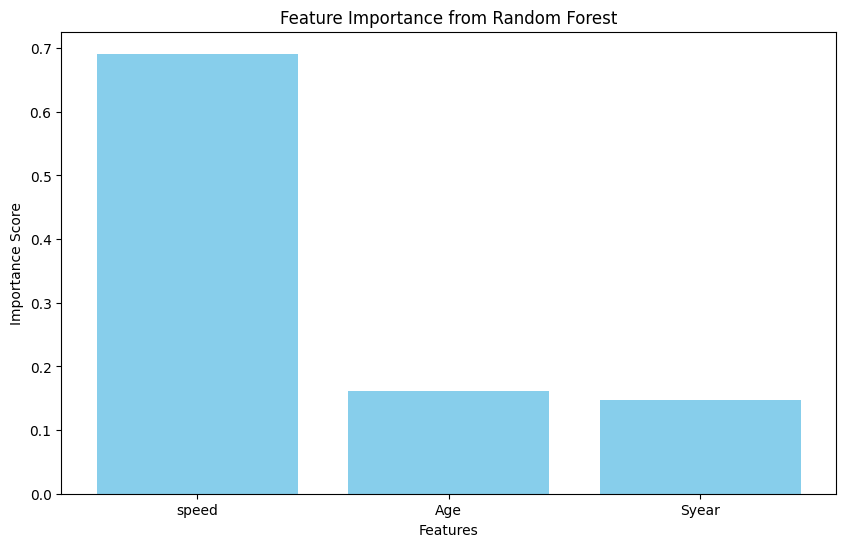

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# 假設您已有 X 和 y 數據
# X 是包含特徵 LS 和 Age 的數據框，y 是目標變量

# 初始化隨機森林模型
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 訓練模型
rf_model.fit(X, y)

# 獲取特徵的重要性
feature_importances = rf_model.feature_importances_

# 查看特徵的重要性
feature_names = X.columns
importance_dict = dict(zip(feature_names, feature_importances))
print("特徵的重要性：", importance_dict)

# 可視化特徵重要性
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance from Random Forest')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions
lda_values = lda_model.predict(X)
lda_proba = lda_model.predict_proba(X)

# Create a DataFrame to store the predictions
lda_results = pd.DataFrame({
    'Predicted_Class': lda_values,
    'Predicted_Probability': [prob.round(3) for prob in lda_proba]#Probabilities for each class
})

# Add the predictions tp original DataFrame
DDAc2_with_predictions = balanced_DDAc2.copy()
DDAc2_with_predictions = pd.concat([DDAc2_with_predictions, lda_results],axis=1)

# Display the first few rows
print("\nFirst few rows of predicitons:")
print(DDAc1_with_predictions.head(10))


First few rows of predicitons:
    event_id  speed   Age  Syear  Lyear Predicted_Class Predicted_Probability
111  SDW_0.4   97.0  35.0    6.0   11.0         SDW_0.4        [0.568, 0.432]
491  SDW_0.4  101.0  47.0   21.0   23.0             NaN                   NaN
882  SDW_0.4   90.0  51.0    9.0   10.0             NaN                   NaN
657  SDW_0.4   93.0  51.0    9.0   10.0             NaN                   NaN
262  SDW_0.4   92.0  49.0    5.0   10.0             NaN                   NaN
890  SDW_0.4   93.0  51.0    9.0   10.0             NaN                   NaN
95   SDW_0.4   97.0  35.0    6.0   11.0         SDW_0.4        [0.555, 0.445]
280  SDW_0.4   99.0  49.0    5.0   10.0             NaN                   NaN
116  SDW_0.4   89.0  35.0    6.0   11.0         SDW_1.2        [0.357, 0.643]
205  SDW_0.4  101.0  57.0   16.0   19.0         SDW_0.4        [0.551, 0.449]


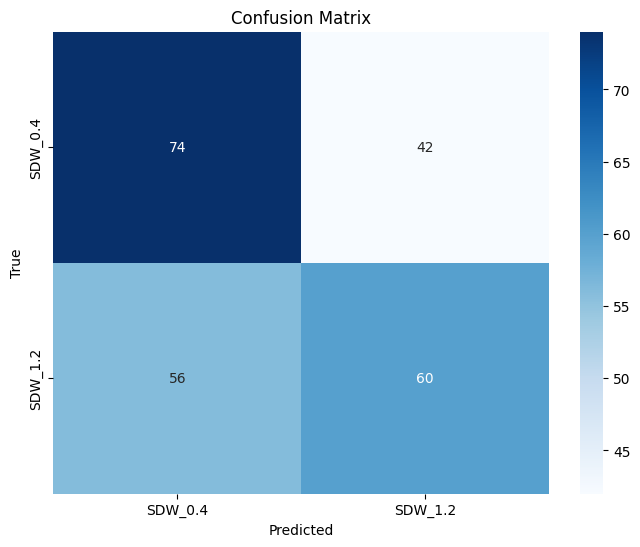

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Compute confusion matrix
conf_atrix = confusion_matrix(y, lda_values, labels=lda_model.classes_)

# Compute accuracy rate
accuracy = accuracy_score(y, lda_values)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_atrix, annot=True, fmt='d', cmap='Blues', xticklabels=lda_model.classes_, yticklabels=lda_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

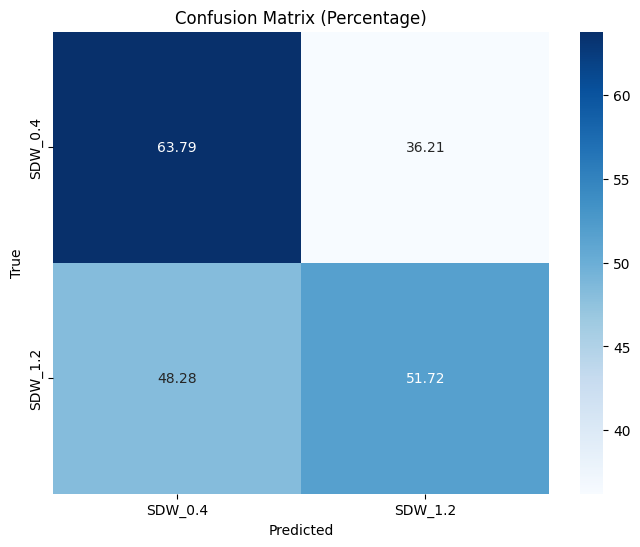

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# 計算混淆矩陣
conf_atrix = confusion_matrix(y, lda_values, labels=lda_model.classes_)

# 計算混淆矩陣每個類別的比例
conf_atrix_percentage = conf_atrix.astype('float') / conf_atrix.sum(axis=1)[:, np.newaxis] * 100

# 計算準確率
accuracy = accuracy_score(y, lda_values)

# 繪製混淆矩陣（百分比格式）
plt.figure(figsize=(8, 6))
sns.heatmap(conf_atrix_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=lda_model.classes_, yticklabels=lda_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Percentage)')
plt.show()

In [ ]:
print("\nAccuracy Rate:")
print(accuracy)


Accuracy Rate:
0.5775862068965517


In [ ]:

# Generate classidicaiton report
report_ann = classification_report(y, lda_values)
print("\nClassification Report:")
print(report_ann)


Classification Report:
              precision    recall  f1-score   support

     SDW_0.4       0.57      0.64      0.60       116
     SDW_1.2       0.59      0.52      0.55       116

    accuracy                           0.58       232
   macro avg       0.58      0.58      0.58       232
weighted avg       0.58      0.58      0.58       232



資料集3

In [ ]:
# Choose variables(columns) and save as DDA
columns_to_select3=[5 ,23 ,27]
DDA3 = DDA_raw.iloc[:, columns_to_select3]

#Display the first few rows of DDA to confirm
print(DDA3.head())

  event_id  speed  Age
0  SDW_0.4   88.0  NaN
1  SDW_0.4   92.0  NaN
2  SDW_0.4   96.0  NaN
3  SDW_0.4   93.0  NaN
4  SDW_0.4  102.0  NaN


資料3清洗

In [ ]:
DDAc3 = DDA3.dropna(axis=0, how='any')

print(DDAc3)

     event_id  speed   Age
26    SDW_0.4   78.0  50.0
27    SDW_0.4   77.0  50.0
28    SDW_0.4   89.0  50.0
29    SDW_0.4  104.0  50.0
30    SDW_0.4   92.0  50.0
...       ...    ...   ...
1263  SDW_1.2   97.0  51.0
1264  SDW_1.2  104.0  51.0
1282  SDW_1.2   91.0  39.0
1283  SDW_1.2   84.0  39.0
1284  SDW_1.2  105.0  39.0

[624 rows x 3 columns]


<Axes: >

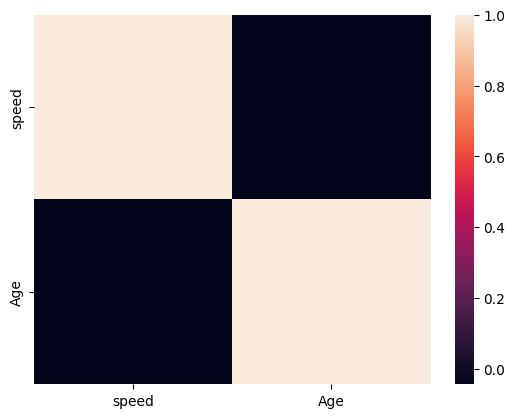

In [ ]:
import seaborn as sns
COR = DDAc3.loc[:,['speed','Age']]
cormat = COR.corr()
sns.heatmap(cormat)

資料3抽樣

In [ ]:
import pandas as pd

# 顯示 DDA 的前幾行以確認
print(DDAc3.head())

# 獲取第五列的名稱，方便引用
column_name = DDAc3.columns[0]

# 將數據按類別分組
grouped = DDAc3.groupby(column_name)

# 找到量多的類別並抽樣，使其與量少的類別匹配
majority_class = grouped.get_group('SDW_0.4')  # 量多的類別
minority_class = grouped.get_group('SDW_1.2')  # 量少的類別

# 從量多的類別中隨機抽樣，樣本數量與量少的類別相同
majority_class_sampled = majority_class.sample(n=len(minority_class), random_state=42)

# 合併抽樣后的多數類別和少數類別
balanced_DDAc3 = pd.concat([majority_class_sampled, minority_class])

# 顯示平衡后的數據集的前幾行
print(balanced_DDAc3.head())

# 計算第 5 列的類別變數數量
DDAc3_y_counts_balance = balanced_DDAc3.iloc[:, 0].value_counts()

# 顯示結果
print(DDAc3_y_counts_balance)

   event_id  speed   Age
26  SDW_0.4   78.0  50.0
27  SDW_0.4   77.0  50.0
28  SDW_0.4   89.0  50.0
29  SDW_0.4  104.0  50.0
30  SDW_0.4   92.0  50.0
    event_id  speed   Age
111  SDW_0.4   97.0  35.0
491  SDW_0.4  101.0  47.0
882  SDW_0.4   90.0  51.0
657  SDW_0.4   93.0  51.0
262  SDW_0.4   92.0  49.0
event_id
SDW_0.4    116
SDW_1.2    116
Name: count, dtype: int64


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
X = balanced_DDAc3[['speed','Age']]
y = balanced_DDAc3.loc[:,"event_id"]

# Inotoalize and fit the LDA model
lda_model = LDA()
lda_model.fit(X,y)

# Get the canonical variables
canonical_vars = lda_model.transform(X)

In [ ]:
# Display the canonical variables
print("Canonical Scores:")
print(canonical_vars[:6],"...","\n")

# Inspect the intercept, coefficients and explained variance ratio
print("Intercept of 3 canonical functions:")
print(lda_model.intercept_,"\n")

print("Coefficients of 3 canonical functions:")
print(lda_model.coef_,"\n")

print("Explained Variance Ratio:")
print(lda_model.explained_variance_ratio_,"\n")

Canonical Scores:
[[-1.59312233]
 [-0.47558863]
 [ 0.48794144]
 [ 0.3441801 ]
 [ 0.17389797]
 [ 0.3441801 ]] ... 

Intercept of 3 canonical functions:
[-0.2729142] 

Coefficients of 3 canonical functions:
[[-0.01713183  0.03900433]] 

Explained Variance Ratio:
[1.] 



特徵的重要性： {'speed': 0.6615755941202178, 'Age': 0.3384244058797822}


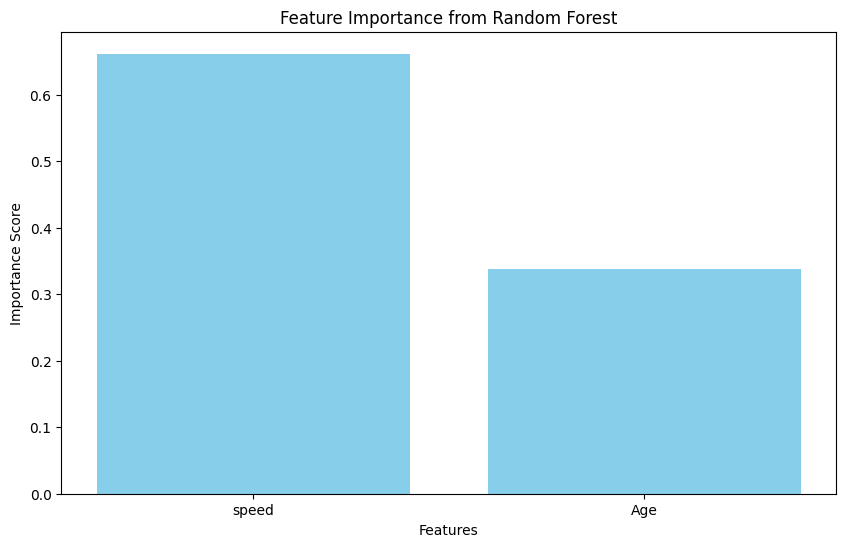

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# 假設您已有 X 和 y 數據
# X 是包含特徵 LS 和 Age 的數據框，y 是目標變量

# 初始化隨機森林模型
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 訓練模型
rf_model.fit(X, y)

# 獲取特徵的重要性
feature_importances = rf_model.feature_importances_

# 查看特徵的重要性
feature_names = X.columns
importance_dict = dict(zip(feature_names, feature_importances))
print("特徵的重要性：", importance_dict)

# 可視化特徵重要性
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance from Random Forest')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions
lda_values = lda_model.predict(X)
lda_proba = lda_model.predict_proba(X)

# Create a DataFrame to store the predictions
lda_results = pd.DataFrame({
    'Predicted_Class': lda_values,
    'Predicted_Probability': [prob.round(3) for prob in lda_proba]#Probabilities for each class
})

# Add the predictions tp original DataFrame
DDAc3_with_predictions = balanced_DDAc3.copy()
DDAc3_with_predictions = pd.concat([DDAc3_with_predictions, lda_results],axis=1)

# Display the first few rows
print("\nFirst few rows of predicitons:")
print(DDAc3_with_predictions.head(10))


First few rows of predicitons:
    event_id  speed   Age Predicted_Class Predicted_Probability
111  SDW_0.4   97.0  35.0         SDW_0.4        [0.539, 0.461]
491  SDW_0.4  101.0  47.0             NaN                   NaN
882  SDW_0.4   90.0  51.0             NaN                   NaN
657  SDW_0.4   93.0  51.0             NaN                   NaN
262  SDW_0.4   92.0  49.0             NaN                   NaN
890  SDW_0.4   93.0  51.0             NaN                   NaN
95   SDW_0.4   97.0  35.0         SDW_0.4        [0.625, 0.375]
280  SDW_0.4   99.0  49.0             NaN                   NaN
116  SDW_0.4   89.0  35.0         SDW_1.2        [0.363, 0.637]
205  SDW_0.4  101.0  57.0         SDW_1.2        [0.483, 0.517]


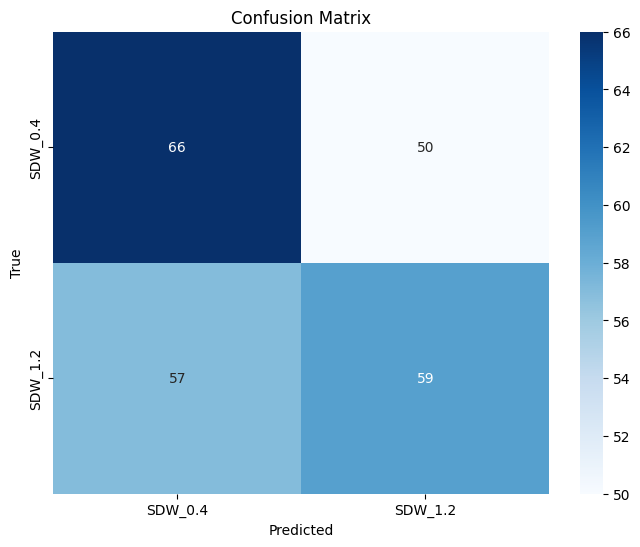

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Compute confusion matrix
conf_atrix = confusion_matrix(y, lda_values, labels=lda_model.classes_)

# Compute accuracy rate
accuracy = accuracy_score(y, lda_values)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_atrix, annot=True, fmt='d', cmap='Blues', xticklabels=lda_model.classes_, yticklabels=lda_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

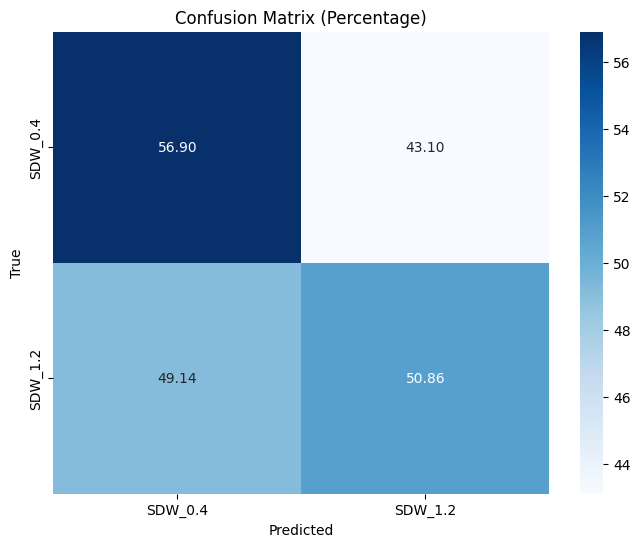

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# 計算混淆矩陣
conf_atrix = confusion_matrix(y, lda_values, labels=lda_model.classes_)

# 計算混淆矩陣每個類別的比例
conf_atrix_percentage = conf_atrix.astype('float') / conf_atrix.sum(axis=1)[:, np.newaxis] * 100

# 計算準確率
accuracy = accuracy_score(y, lda_values)

# 繪製混淆矩陣（百分比格式）
plt.figure(figsize=(8, 6))
sns.heatmap(conf_atrix_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=lda_model.classes_, yticklabels=lda_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Percentage)')
plt.show()

In [ ]:
print("\nAccuracy Rate:")
print(accuracy)


Accuracy Rate:
0.5387931034482759


In [ ]:

# Generate classidicaiton report
report_ann = classification_report(y, lda_values)
print("\nClassification Report:")
print(report_ann)


Classification Report:
              precision    recall  f1-score   support

     SDW_0.4       0.54      0.57      0.55       116
     SDW_1.2       0.54      0.51      0.52       116

    accuracy                           0.54       232
   macro avg       0.54      0.54      0.54       232
weighted avg       0.54      0.54      0.54       232



資料4

In [ ]:
# Choose variables(columns) and save as DDA
columns_to_select4=[5 ,23]
DDA4 = DDA_raw.iloc[:, columns_to_select4]

#Display the first few rows of DDA to confirm
print(DDA4.head())

  event_id  speed
0  SDW_0.4   88.0
1  SDW_0.4   92.0
2  SDW_0.4   96.0
3  SDW_0.4   93.0
4  SDW_0.4  102.0


In [ ]:
DDAc4 = DDA4.dropna(axis=0, how='any')

print(DDAc4)

     event_id  speed
0     SDW_0.4   88.0
1     SDW_0.4   92.0
2     SDW_0.4   96.0
3     SDW_0.4   93.0
4     SDW_0.4  102.0
...       ...    ...
1319  SDW_1.2   94.0
1320  SDW_1.2   97.0
1321  SDW_1.2   85.0
1322  SDW_1.2   93.0
1323  SDW_1.2   92.0

[1324 rows x 2 columns]


In [ ]:
import pandas as pd

# 顯示 DDA 的前幾行以確認
print(DDAc4.head())

# 獲取第五列的名稱，方便引用
column_name = DDAc4.columns[0]

# 將數據按類別分組
grouped = DDAc4.groupby(column_name)

# 找到量多的類別並抽樣，使其與量少的類別匹配
majority_class = grouped.get_group('SDW_0.4')  # 量多的類別
minority_class = grouped.get_group('SDW_1.2')  # 量少的類別

# 從量多的類別中隨機抽樣，樣本數量與量少的類別相同
majority_class_sampled = majority_class.sample(n=len(minority_class), random_state=42)

# 合併抽樣后的多數類別和少數類別
balanced_DDAc4 = pd.concat([majority_class_sampled, minority_class])

# 顯示平衡后的數據集的前幾行
print(balanced_DDAc4.head())

# 計算第 5 列的類別變數數量
DDAc4_y_counts_balance = balanced_DDAc4.iloc[:, 0].value_counts()

# 顯示結果
print(DDAc4_y_counts_balance)

  event_id  speed
0  SDW_0.4   88.0
1  SDW_0.4   92.0
2  SDW_0.4   96.0
3  SDW_0.4   93.0
4  SDW_0.4  102.0
    event_id  speed
525  SDW_0.4   83.0
357  SDW_0.4   87.0
444  SDW_0.4  105.0
31   SDW_0.4   88.0
618  SDW_0.4   92.0
event_id
SDW_0.4    300
SDW_1.2    300
Name: count, dtype: int64


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
X = balanced_DDAc3[['speed']]
y = balanced_DDAc3.loc[:,"event_id"]

# Inotoalize and fit the LDA model
lda_model = LDA()
lda_model.fit(X,y)

# Get the canonical variables
canonical_vars = lda_model.transform(X)

In [ ]:
# Display the canonical variables
print("Canonical Scores:")
print(canonical_vars[:6],"...","\n")

# Inspect the intercept, coefficients and explained variance ratio
print("Intercept of 3 canonical functions:")
print(lda_model.intercept_,"\n")

print("Coefficients of 3 canonical functions:")
print(lda_model.coef_,"\n")

print("Explained Variance Ratio:")
print(lda_model.explained_variance_ratio_,"\n")

Canonical Scores:
[[0.63734174]
 [0.92196788]
 [0.13924598]
 [0.35271559]
 [0.28155905]
 [0.35271559]] ... 

Intercept of 3 canonical functions:
[1.63710508] 

Coefficients of 3 canonical functions:
[[-0.01859436]] 

Explained Variance Ratio:
[1.] 



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions
lda_values = lda_model.predict(X)
lda_proba = lda_model.predict_proba(X)

# Create a DataFrame to store the predictions
lda_results = pd.DataFrame({
    'Predicted_Class': lda_values,
    'Predicted_Probability': [prob.round(3) for prob in lda_proba]#Probabilities for each class
})

# Add the predictions tp original DataFrame
DDAc4_with_predictions = balanced_DDAc4.copy()
DDAc4_with_predictions = pd.concat([DDAc4_with_predictions, lda_results],axis=1)

# Display the first few rows
print("\nFirst few rows of predicitons:")
print(DDAc3_with_predictions.head(10))


First few rows of predicitons:
    event_id  speed   Age Predicted_Class Predicted_Probability
111  SDW_0.4   97.0  35.0         SDW_0.4        [0.539, 0.461]
491  SDW_0.4  101.0  47.0             NaN                   NaN
882  SDW_0.4   90.0  51.0             NaN                   NaN
657  SDW_0.4   93.0  51.0             NaN                   NaN
262  SDW_0.4   92.0  49.0             NaN                   NaN
890  SDW_0.4   93.0  51.0             NaN                   NaN
95   SDW_0.4   97.0  35.0         SDW_0.4        [0.625, 0.375]
280  SDW_0.4   99.0  49.0             NaN                   NaN
116  SDW_0.4   89.0  35.0         SDW_1.2        [0.363, 0.637]
205  SDW_0.4  101.0  57.0         SDW_1.2        [0.483, 0.517]


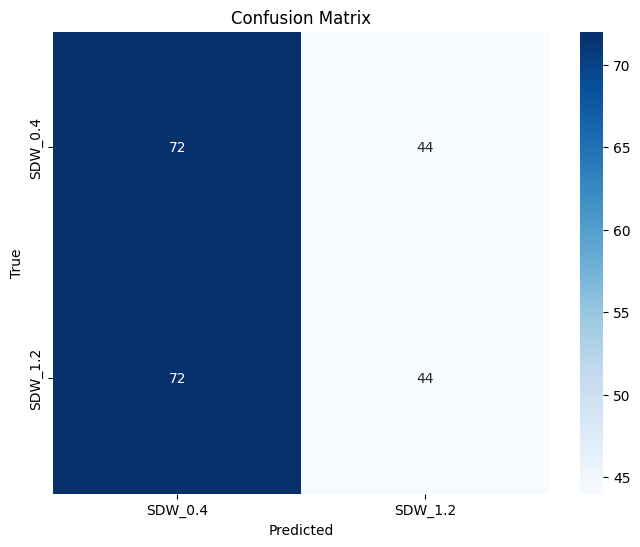

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Compute confusion matrix
conf_atrix = confusion_matrix(y, lda_values, labels=lda_model.classes_)

# Compute accuracy rate
accuracy = accuracy_score(y, lda_values)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_atrix, annot=True, fmt='d', cmap='Blues', xticklabels=lda_model.classes_, yticklabels=lda_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

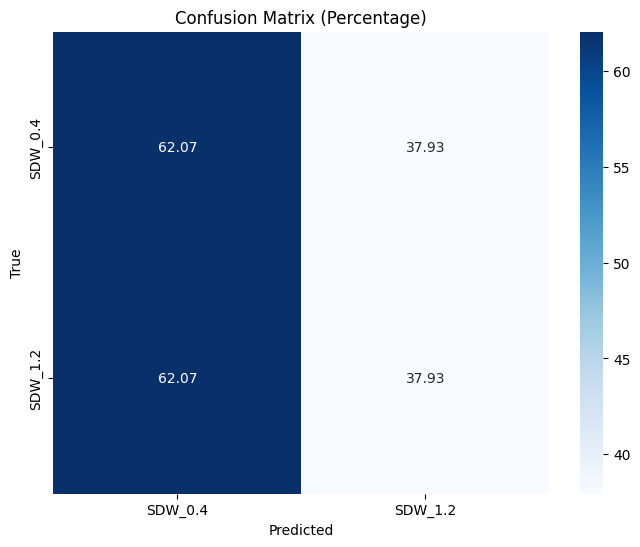

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# 計算混淆矩陣
conf_atrix = confusion_matrix(y, lda_values, labels=lda_model.classes_)

# 計算混淆矩陣每個類別的比例
conf_atrix_percentage = conf_atrix.astype('float') / conf_atrix.sum(axis=1)[:, np.newaxis] * 100

# 計算準確率
accuracy = accuracy_score(y, lda_values)

# 繪製混淆矩陣（百分比格式）
plt.figure(figsize=(8, 6))
sns.heatmap(conf_atrix_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=lda_model.classes_, yticklabels=lda_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Percentage)')
plt.show()

In [ ]:
print("\nAccuracy Rate:")
print(accuracy)


Accuracy Rate:
0.5


In [ ]:

# Generate classidicaiton report
report_ann = classification_report(y, lda_values)
print("\nClassification Report:")
print(report_ann)


Classification Report:
              precision    recall  f1-score   support

     SDW_0.4       0.50      0.62      0.55       116
     SDW_1.2       0.50      0.38      0.43       116

    accuracy                           0.50       232
   macro avg       0.50      0.50      0.49       232
weighted avg       0.50      0.50      0.49       232



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the canonical variables to a DataFrame
canonical_df=pd.DataFrame(canonical_vars, columns=['DF1','DF2'])
canonical_df['Group']=y.values # Add the group labels to the DataFrame

# Plotting
plt.figure(figsize=(10,6))
sns.scatterplot(data=canonical_df, x='DF1', y='DF2', hue='Group', s=100, edgecolor="k")

# Add plot details
plt.title('Canonical Score Plot')
plt.xlabel('Discriminat Function 1 (DF1)')
plt.ylabel('Discriminat Function 2 (DF2)')
plt.legend(title='Group')
plt.grid(True)
plt.show()

ValueError: Shape of passed values is (232, 1), indices imply (232, 2)